# Social Network Analysis in Python

- author: Lei (Nico) Zheng 
- email: lzheng9[at]stevens.edu

You can also access the content of this notebook in my github: 

http://nbviewer.jupyter.org/github/Nicozheng/teaching_network/blob/master/Social%20Network%20Analysis%20in%20Python.ipynb

### Networkx

- Networkx: most popular Network package in python.
- Project Homepage: https://networkx.github.io/documentation/stable/tutorial.html
- Project Github: https://github.com/networkx/networkx

#### Install 

for anaconda users:

    conda install networkx

for pip users:
    
    pip install networkx

for pip user to upgrade:

    pip install --upgrade networkx
    
**Note**: this notebook is based on networkx v2.4

In [1]:
### import packages 

In [1]:
import networkx as nx 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

%matplotlib inline

## Creating a graph

<img src="https://github.com/christine62/python-tutorial/blob/master/image/network1.2.png?raw=true" width=20%>

In [2]:
## directly create
G = nx.Graph()  # create an undirected graph 
G.add_edge('A','B', weight=6, relation ='family')
G.add_edge('B','C', weight=13, relation='friend')
G.add_edge('C','E', weight=25, relation='neighbor')
G.add_edge('D','E', weight=2, relation='coworker')
G.add_edge('E','I', weight=10, relation='coworker')
G.add_edge('E','H', weight=9, relation='coworker')

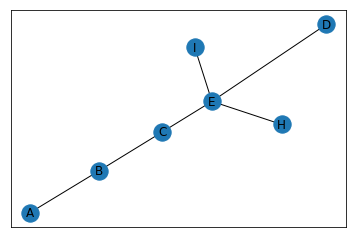

In [3]:
nx.draw_networkx(G)

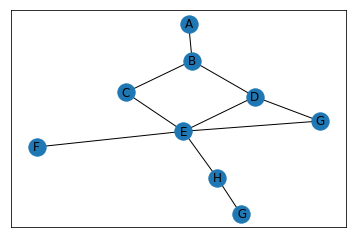

In [4]:
# Create from adjacency list 
G = nx.from_edgelist([("A","B"), ("B","C"), ("B","D"), ("C","E"), ("D","E"), ("D","G"), ("E","H"), ("E","G"), ("E","F"), ("H"," G")], create_using=nx.Graph())  
nx.draw_networkx(G)

In [6]:
## creating from adjacency matrix 
data = pd.read_csv("data/adj_matrix.txt", sep="\t", index_col=0)
data

,A,B,C,D,E,F,G,H
A,0,1,0,0,0,0,0,0
B,1,0,1,0,0,0,0,0
C,0,1,0,0,1,0,0,0
D,0,1,0,0,1,0,1,0
E,0,0,0,1,0,1,1,1
F,0,0,0,0,0,0,0,0
G,0,0,0,1,0,0,0,1
H,0,0,0,0,0,0,1,0


{0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H'}


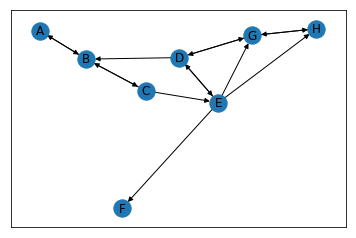

In [7]:
 # creating a directed graph from adjacency matrix
G = nx.from_numpy_matrix(data.values, create_using=nx.DiGraph())
node_name = dict(zip(range(0,len(data)),data.index.values))
print(node_name)
G = nx.relabel_nodes(G, node_name)  ## function to rename node
nx.draw_networkx(G)

In [8]:
## write to gml file 
nx.write_gml(G, "test.gml")

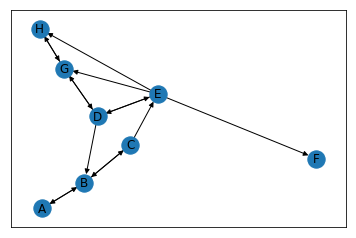

In [9]:
## load from current gml file 
G = nx.read_gml("test.gml")
nx.draw_networkx(G)

## Add Node/Edge attributes

In [10]:
G

In [11]:
# access all the graph nodes and edges, with their associated information
print(G.nodes(data=True))
print(G.edges(data=True))

[('A', {}), ('B', {}), ('C', {}), ('D', {}), ('E', {}), ('F', {}), ('G', {}), ('H', {})]
[('A', 'B', {'weight': 1}), ('B', 'A', {'weight': 1}), ('B', 'C', {'weight': 1}), ('C', 'B', {'weight': 1}), ('C', 'E', {'weight': 1}), ('D', 'B', {'weight': 1}), ('D', 'E', {'weight': 1}), ('D', 'G', {'weight': 1}), ('E', 'D', {'weight': 1}), ('E', 'F', {'weight': 1}), ('E', 'G', {'weight': 1}), ('E', 'H', {'weight': 1}), ('G', 'D', {'weight': 1}), ('G', 'H', {'weight': 1}), ('H', 'G', {'weight': 1})]


We can see, basically, networkx store the graph nodes and edges as tuples, and their associated information as a dictionary. Hence we can add/remove/change their information by directly accessing the node/edge, then manipulate based on dictionary manipulation.

In [13]:
## Let nodes A-D to be green, nodes E-H tobe blue
for i in list('ABCD'):
    G.nodes[i]['color'] = 'green'
for i in list('EFGH'):
    G.nodes[i]['color'] = 'blue'
G.nodes(data=True)

NodeDataView({'A': {'color': 'green'}, 'B': {'color': 'green'}, 'C': {'color': 'green'}, 'D': {'color': 'green'}, 'E': {'color': 'blue'}, 'F': {'color': 'blue'}, 'G': {'color': 'blue'}, 'H': {'color': 'blue'}})

In [14]:
## Let each edge has a random weight 
for i,j in G.edges:
    G[i][j]['weight'] = np.random.rand()
G.edges(data=True)

OutEdgeDataView([('A', 'B', {'weight': 0.06392734471331973}), ('B', 'A', {'weight': 0.2456571436617504}), ('B', 'C', {'weight': 0.05403107806207352}), ('C', 'B', {'weight': 0.9062842872056339}), ('C', 'E', {'weight': 0.578474365413623}), ('D', 'B', {'weight': 0.4134505660127482}), ('D', 'E', {'weight': 0.9829252330618142}), ('D', 'G', {'weight': 0.677036950474047}), ('E', 'D', {'weight': 0.4893526946709723}), ('E', 'F', {'weight': 0.5406087049510981}), ('E', 'G', {'weight': 0.2473612312938287}), ('E', 'H', {'weight': 0.0077335936614977285}), ('G', 'D', {'weight': 0.32840435538077983}), ('G', 'H', {'weight': 0.26346902533555583}), ('H', 'G', {'weight': 0.26505291028569367})])

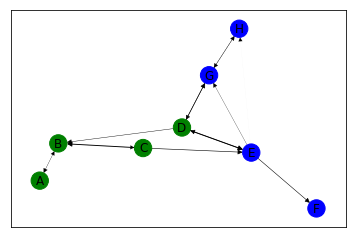

In [16]:
# plot graph 
node_color = [G.nodes[c]['color'] for c in G.nodes]
edge_weight = [G.edges[c]['weight'] for c in G.edges]
nx.draw_networkx(G, node_color=node_color, width = edge_weight)

## Graph Visualization

Suppose we try to visualize US states relation based on movement of their population (which calculated as **weight** attribute in the following dataframe.

In [17]:
df = pd.read_csv('data/major_us_cities_edges.csv')
df.head()

,0,1,weight
0,"El Paso, TX","Albuquerque, NM",367.885844
1,"El Paso, TX","Mesa, AZ",536.256660
2,"El Paso, TX","Tucson, AZ",425.413867
3,"El Paso, TX","Phoenix, AZ",558.783570
4,"El Paso, TX","Colorado Springs, CO",797.751712


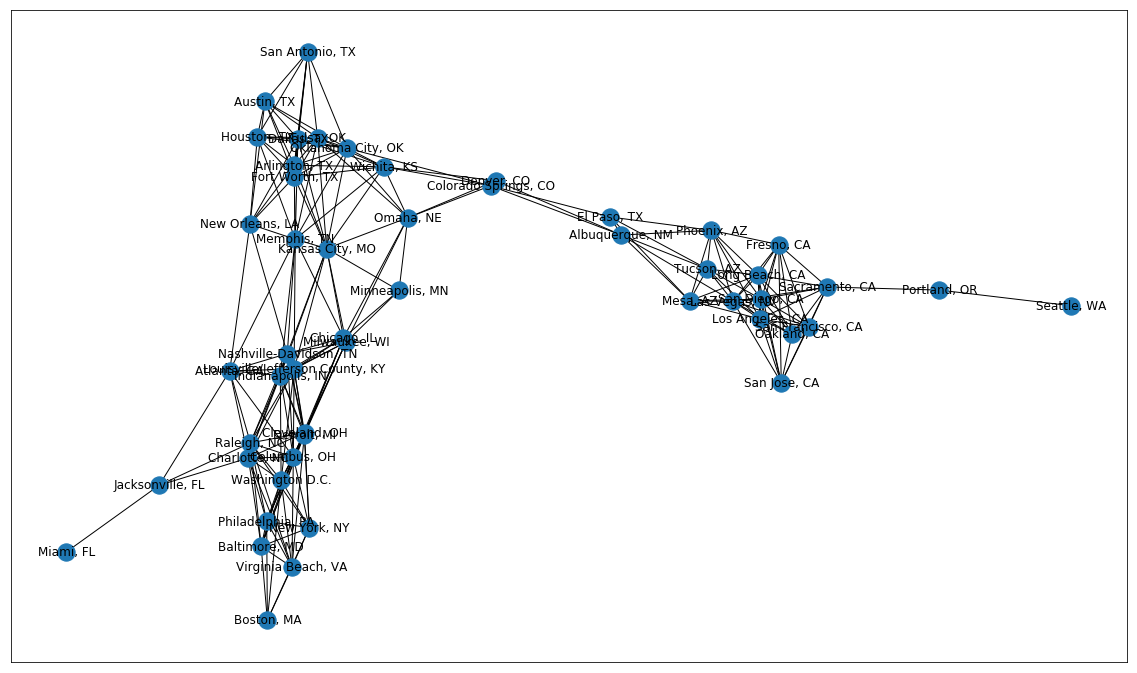

In [18]:
G = nx.from_pandas_edgelist(df, '0', '1', edge_attr='weight')
plt.figure(figsize=(20,12))
nx.draw_networkx(G)

The above visualization is .... **unwatchable**! Hence we will try to:
1. locate each state based on their physical location (longitude and latitude)
2. use node size to represent their population
3. emphasize the edges that have large weight

In [20]:
df2 = pd.read_csv('data/major_us_cities_nodes.csv')  # read related information
df2.head()

,0,population,longitude,latitude
0,"El Paso, TX",674433,-106,31
1,"Long Beach, CA",469428,-118,33
2,"Dallas, TX",1257676,-96,32
3,"Oakland, CA",406253,-122,37
4,"Albuquerque, NM",556495,-106,35


In [21]:
map_dict = df2.set_index('0').to_dict()

In [23]:
## add node associated information
for node in G.nodes():
    G.nodes[node]['population'] = map_dict['population'][node]
    G.nodes[node]['position'] = (map_dict['longitude'][node],map_dict['latitude'][node])

In [24]:
G.nodes(data=True)   ## check the information was added 

NodeDataView({'El Paso, TX': {'population': 674433, 'position': (-106, 31)}, 'Albuquerque, NM': {'population': 556495, 'position': (-106, 35)}, 'Mesa, AZ': {'population': 457587, 'position': (-111, 33)}, 'Tucson, AZ': {'population': 526116, 'position': (-110, 32)}, 'Phoenix, AZ': {'population': 1513367, 'position': (-112, 33)}, 'Colorado Springs, CO': {'population': 439886, 'position': (-104, 38)}, 'Long Beach, CA': {'population': 469428, 'position': (-118, 33)}, 'Oakland, CA': {'population': 406253, 'position': (-122, 37)}, 'Sacramento, CA': {'population': 479686, 'position': (-121, 38)}, 'San Jose, CA': {'population': 998537, 'position': (-121, 37)}, 'Fresno, CA': {'population': 509924, 'position': (-119, 36)}, 'San Diego, CA': {'population': 1355896, 'position': (-117, 32)}, 'San Francisco, CA': {'population': 837442, 'position': (-122, 37)}, 'Los Angeles, CA': {'population': 3884307, 'position': (-118, 34)}, 'Las Vegas, NV': {'population': 603488, 'position': (-115, 36)}, 'Dallas, 

In [25]:
position = dict(G.nodes(data='position'))
size = [G.nodes[c]['population']/1000 for c in G.nodes()]
edge_weight = [np.log(G[c[0]][c[1]]['weight'])/5 for c in G.edges()]

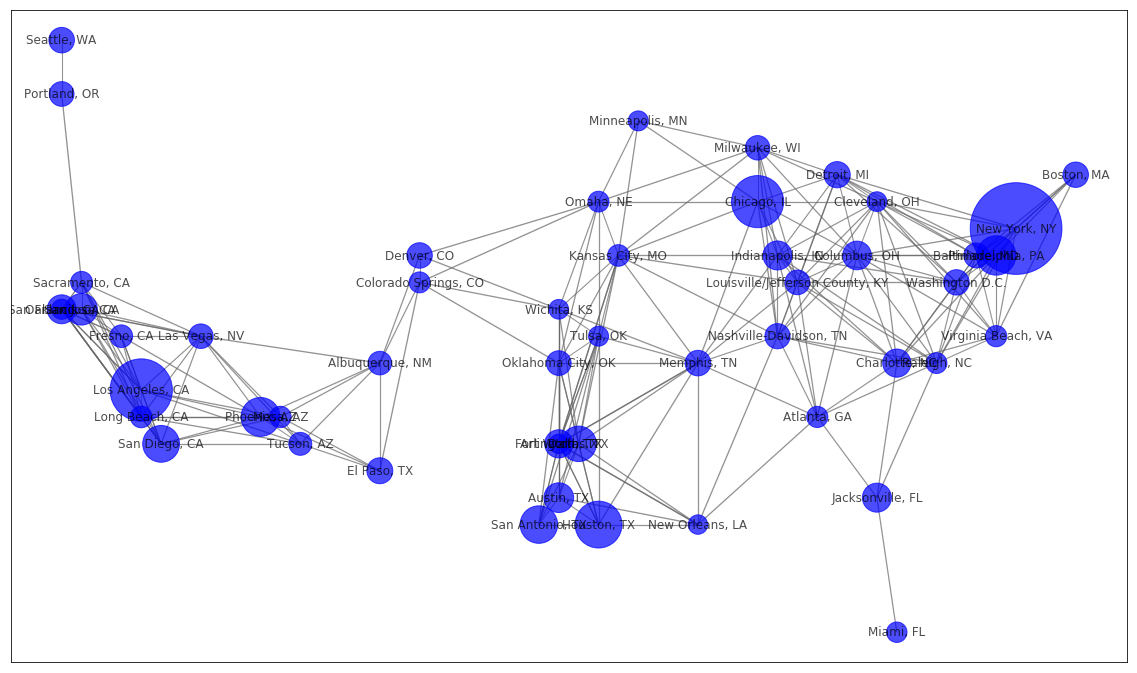

In [26]:
plt.figure(figsize=(20,12))
nx.draw_networkx(G, position, node_size=size, 
                 node_color='blue', alpha=0.7, with_labels=True, 
                 width=edge_weight, edge_color='0.4', cmap=plt.cm.Blues)

## Analyzing Graph 

<img src="https://github.com/christine62/python-tutorial/blob/master/image/network1.2.png?raw=true" width=20%>

In [27]:
G = nx.Graph()  # create an undirected graph 
G.add_edge('A','B', weight=6, relation ='family')
G.add_edge('B','C', weight=13, relation='friend')
G.add_edge('C','E', weight=25, relation='neighbor')
G.add_edge('D','E', weight=2, relation='coworker')
G.add_edge('E','I', weight=10, relation='coworker')
G.add_edge('E','H', weight=9, relation='coworker')
G.add_edge('E','J', weight=15, relation='family')
G.add_edge('I','J', weight=3, relation='coworker')
G.add_edge('C','F', weight=21, relation='coworker')
G.add_edge('G','F', weight=9, relation='friend')

In [28]:
G.nodes()

NodeView(('A', 'B', 'C', 'E', 'D', 'I', 'H', 'J', 'F', 'G'))

#### Suppose we try to find who is connected with person C?

In [29]:
# neighbors
list(G.neighbors('C'))

['B', 'E', 'F']

#### Who is the most important person to C among above 3 people? Let's rank the neighbors based on their co-lunch time

In [30]:
neighbors = list(G.neighbors('C'))
rank = pd.Series([G[c]['C']['weight'] for c in neighbors])
rank.index = neighbors
rank.sort_values(ascending=False, inplace=True)
rank

E    25
F    21
B    13
dtype: int64

#### How should person J get connected to person G?

In [33]:
nx.shortest_path(G, 'J', 'G')

['J', 'E', 'C', 'F', 'G']

#### Who is the most important person in the network?

Well to that question, we have multiple answers:

Suppose we try to measure that based on who know more people, that will be node's **degree centrality**.

In [34]:
# degree or degree centrality
degree_distribution = pd.Series(dict(G.degree())).sort_values(ascending=False)
degree_distribution[:10]

E    5
C    3
F    2
J    2
I    2
B    2
G    1
H    1
D    1
A    1
dtype: int64

Suppose we try to measure that based on who have shortest path towards other people in the network. That will be **closeness centrality**. 

From [Wiki closeness_centrality](https://en.wikipedia.org/wiki/Closeness_centrality): In a connected graph, closeness centrality (or closeness) of a node is a measure of centrality in a network, calculated as the reciprocal of the sum of the length of the shortest paths between the node and all other nodes in the graph. Thus, the more central a node is, the closer it is to all other nodes.

In [35]:
# closeness centrality
pd.Series(nx.closeness_centrality(G)).sort_values(ascending=False)

E    0.600000
C    0.600000
F    0.428571
B    0.428571
J    0.409091
I    0.409091
H    0.391304
D    0.391304
G    0.310345
A    0.310345
dtype: float64

Suppose we try to measure that based on who serve as the "bridge" to connect most people in the network. That will be **betweenness centrality**. 

From [Wiki closeness_centrality](https://en.wikipedia.org/wiki/Centrality#Betweenness_centrality): Betweenness centrality quantifies the number of times a node acts as a bridge along the shortest path between two other nodes. 

In [36]:
# betweenness centrality 
pd.Series(nx.betweenness_centrality(G)).sort_values(ascending=False)

E    0.694444
C    0.666667
F    0.222222
B    0.222222
G    0.000000
J    0.000000
H    0.000000
I    0.000000
D    0.000000
A    0.000000
dtype: float64

#### Suppose we want to know how many coworker clusters in the network?

We should first filter edges that are not "coworker relation" and generate connected component based on the subgraph 

In [37]:
edges_filter = [c for c in G.edges() if G[c[0]][c[1]]['relation'] is 'coworker']
subG = nx.edge_subgraph(G, edges_filter)
list(nx.connected_components(subG))

[{'C', 'F'}, {'D', 'E', 'H', 'I', 'J'}]

- More analyze algorithms can be found in networkx document here: https://networkx.github.io/documentation/stable/reference/algorithms/index.html

## Generate and compare a famous graph 

Graph theory can be traced back to 1736, where mathmaticas propose use graph as a framework to analyze Königsberg bridge problem. (whether was there any way to walk over all the bridges once and only once and return to the same place were they started the walk?)

<img src="https://cdn-images-1.medium.com/max/600/1*cG-NHqwXxxj6KHTffSzrdw.gif">

After that, many famous graph models were proposed to mimic real world relations among different objects. Hence, we can consider graph as a new framework/methodology to solve realworld problem.

Well, different assumptions will yeild different network structure, and different network structure will have different network properties. 

There are basically, 4 categories of network models. They are:
- **Regular lattices**: each node will have exactly the same number of neighbors. This network structure usually can be found in many man-made structures, for example, a nerual network model. 
- **Random ER (ER) graphs**: which are generated by starting with a disconnected set of nodes that are then paired with a uniform probability.
- **Small World (SW) networks**: Watts and Strogatz (1998) proposed a model where the connections between the nodes in a regular graph were rewired with a certain probability. This network can mimic most real-world human network relationships, with relatively high modularity, about the same shortest path between every two nodes that randomly picked. 
- **Scale-free (SF) networks**: Networks whose degree distribution follows a "power-law" distribution (Barabasi & Albert 1999). They are called scale-free, because zooming in on any part of the distribution doesn’t change its shape: there is a few, but significant number of nodes with a lot of connections and there’s a trailing tail of nodes with a very few connections at each level of magnification. This network ususally used to represent network relationhsip in the Internet.  

### Generate and compare different network structure

In [40]:
G1 = nx.random_regular_graph(d=3, n=100)
G2 = nx.fast_gnp_random_graph(n=100, p=0.1)
G3 = nx.watts_strogatz_graph(n=100, k=3, p=0.5)
G4 = nx.barabasi_albert_graph(n=100,m=1)

Text(0.5, 1.0, 'Scale-free (SF) networks')

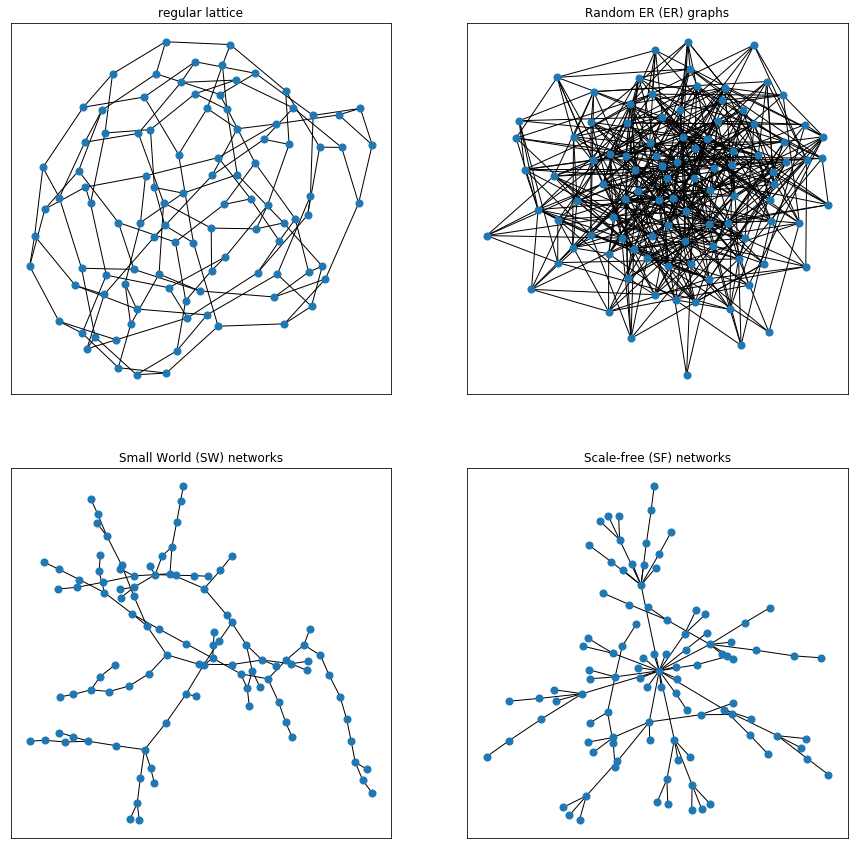

In [41]:
fig = plt.figure(figsize=(15,15))
fig.add_subplot(221)
nx.draw_networkx(G1, with_labels=False, node_size=50)
plt.title('regular lattice')
fig.add_subplot(222)
nx.draw_networkx(G2, with_labels=False, node_size=50)
plt.title('Random ER (ER) graphs')
fig.add_subplot(223)
nx.draw_networkx(G3, with_labels=False, node_size=50)
plt.title('Small World (SW) networks')
fig.add_subplot(224)
nx.draw_networkx(G4, with_labels=False, node_size=50)
plt.title('Scale-free (SF) networks')

### Compare Nodes Heterogeneity in above graphs 

Well, we can easily see above four graph are very different from each other. In the lattice network, every node has 3 neighbors; whereas in ER graph, some nodes have more neighbors and some have less, but they are have about the same neighbors. However, in SW and SF networks, we can see only a little nodes have many neighbors and most have less neighbors. 

How can we measure the difference? Well, we could quantify the node heterogeneity using [gini coefficient](https://en.wikipedia.org/wiki/Gini_coefficient) of the graph's degree distribution. Gini coefficient is a quite common measurement to quantify skewness of a distribution, also widely used to quantify the inequality of income or wealth distribution in a country. 

**gini higher --> more skew --> more inbalance**

In [42]:
def gini(x):
    x = sorted(x)
    N = len(x)
    B = sum(xi * (N-i) for i,xi in enumerate(x))/(N*sum(x))
    return (1 + (1/N) - 2*B)

In [43]:
gini_coef = dict()
gini_coef['regular lattice'] = gini(np.array(list(dict(G1.degree()).values())))
gini_coef['Random ER (ER) graphs'] = gini(np.array(list(dict(G2.degree()).values())))
gini_coef['Small World (SW) networks'] = gini(np.array(list(dict(G3.degree()).values())))
gini_coef['Scale-free (SF) networks'] = gini(np.array(list(dict(G4.degree()).values())))

In [44]:
gini_coef

{'regular lattice': 0.0,
 'Random ER (ER) graphs': 0.16220272904483435,
 'Small World (SW) networks': 0.2247,
 'Scale-free (SF) networks': 0.3921212121212121}

From above result, we could find among four networks, SF network model is the most inbalanced. Which indicates, the inequality is most severe in the Internet world. 

How about other network properties?

<img src="https://github.com/Nicozheng/teaching_network/blob/master/network_comparison.png?raw=true">

Well, for more information and comparison among famous network models, I recommend to read this interesting paper (Sole and Valverde, 2004). http://complex.upf.es/~ricard/INFONETS.pdf